In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
file_name = ('.\sets.csv')
df_sets = pd.read_csv(file_name)
df_sets.head(5)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


Isolate sets based on the 2001 year

In [9]:
df_2001sets = df_sets.loc[df_sets['year']==2001, ['set_num','name','year','theme_id','num_parts']]
df_2001sets.head(6)

,set_num,name,year,theme_id,num_parts
25,10000-1,Guarded Inn,2001,186,256
26,10001-1,Metroliner,2001,233,785
27,10002-1,Railroad Club Car,2001,233,272
28,10003-1,1 x 2 Sand Red Bricks,2001,254,100
29,10004-1,2 x 2 Sand Red Bricks,2001,254,100
30,10005-1,2 x 4 Sand Red Bricks,2001,254,50


Text(0.5, 1.0, 'Lego sets released by theme in 2001')

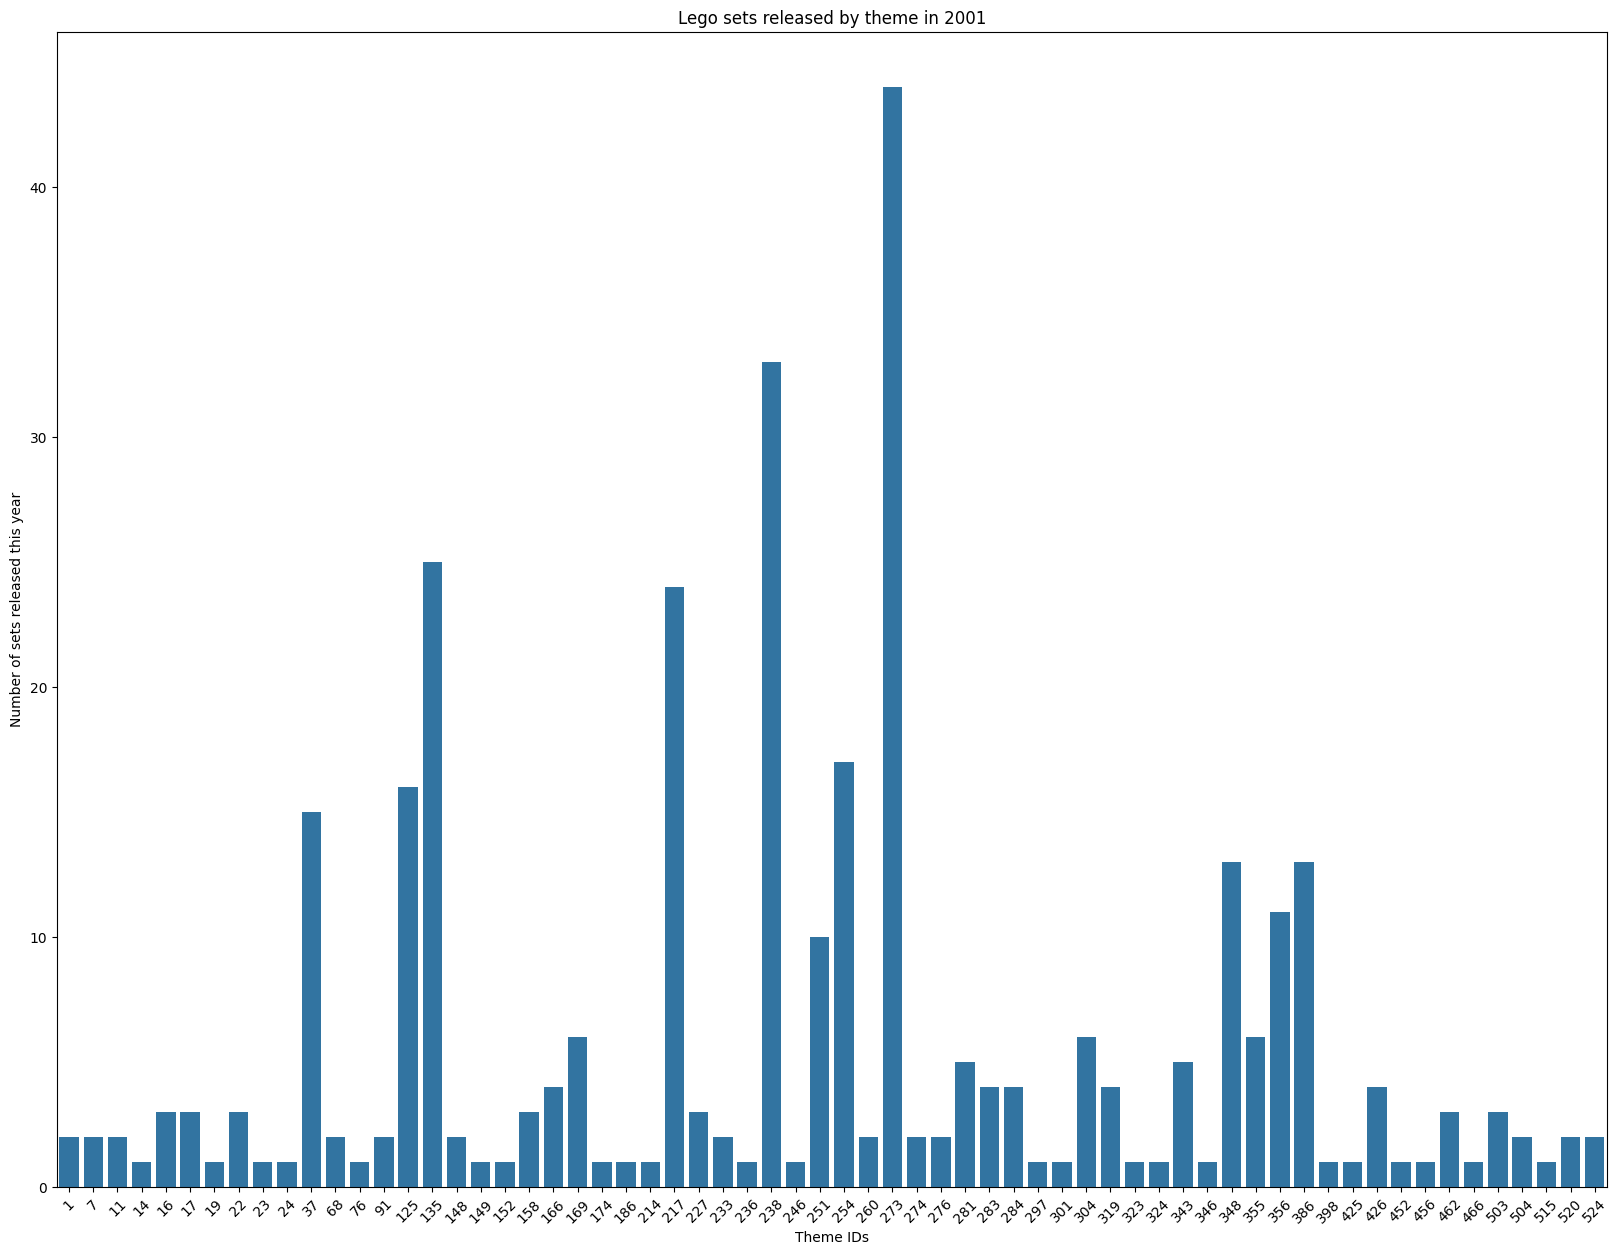

In [10]:
plt.figure(figsize=(20,15))
sns.countplot(x='theme_id', data=df_2001sets)
plt.ylabel('Number of sets released this year')
plt.xlabel('Theme IDs')
plt.xticks(rotation=45)
plt.title('Lego sets released by theme in 2001')

In [12]:
file2 = ('K:/git_repo/MainRepo/Projects/Lego project/xthemes.csv')
df_themes = pd.read_csv(file2)
df_themes.replace(['None', 'nan'], np.nan, inplace=True)
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [13]:
df_2001sets['Parent Theme'] = df_2001sets['theme_id']
df_2001sets['theme_id'] = df_2001sets['theme_id'].map(df_themes.set_index('id')['name'])
df_2001sets['Parent Theme'] = df_2001sets['Parent Theme'].map(df_themes.set_index('id')['parent_id'])
df_2001sets['Parent Theme'] = df_2001sets['Parent Theme'].map(df_themes.set_index('id')['name'])
df_2001sets.head(55)


,set_num,name,year,theme_id,num_parts,Parent Theme
25,10000-1,Guarded Inn,2001,Castle,256,NaN
26,10001-1,Metroliner,2001,Train,785,NaN
27,10002-1,Railroad Club Car,2001,Train,272,NaN
28,10003-1,1 x 2 Sand Red Bricks,2001,Bulk Bricks,100,NaN
29,10004-1,2 x 2 Sand Red Bricks,2001,Bulk Bricks,100,NaN
30,10005-1,2 x 4 Sand Red Bricks,2001,Bulk Bricks,50,NaN
31,10006-1,1 x 6 Sand Red Bricks,2001,Bulk Bricks,50,NaN
32,10007-1,2 x 4 Sand Red Ridge Roof Tiles Steep Slope,2001,Bulk Bricks,25,NaN
33,10008-1,2 x 4 Roof Tile Sand Red,2001,Bulk Bricks,50,NaN
34,10009-1,Assorted Blue Bricks,2001,Bulk Bricks,62,NaN


Text(0.5, 1.0, 'Lego sets released by sub-theme in 2001')

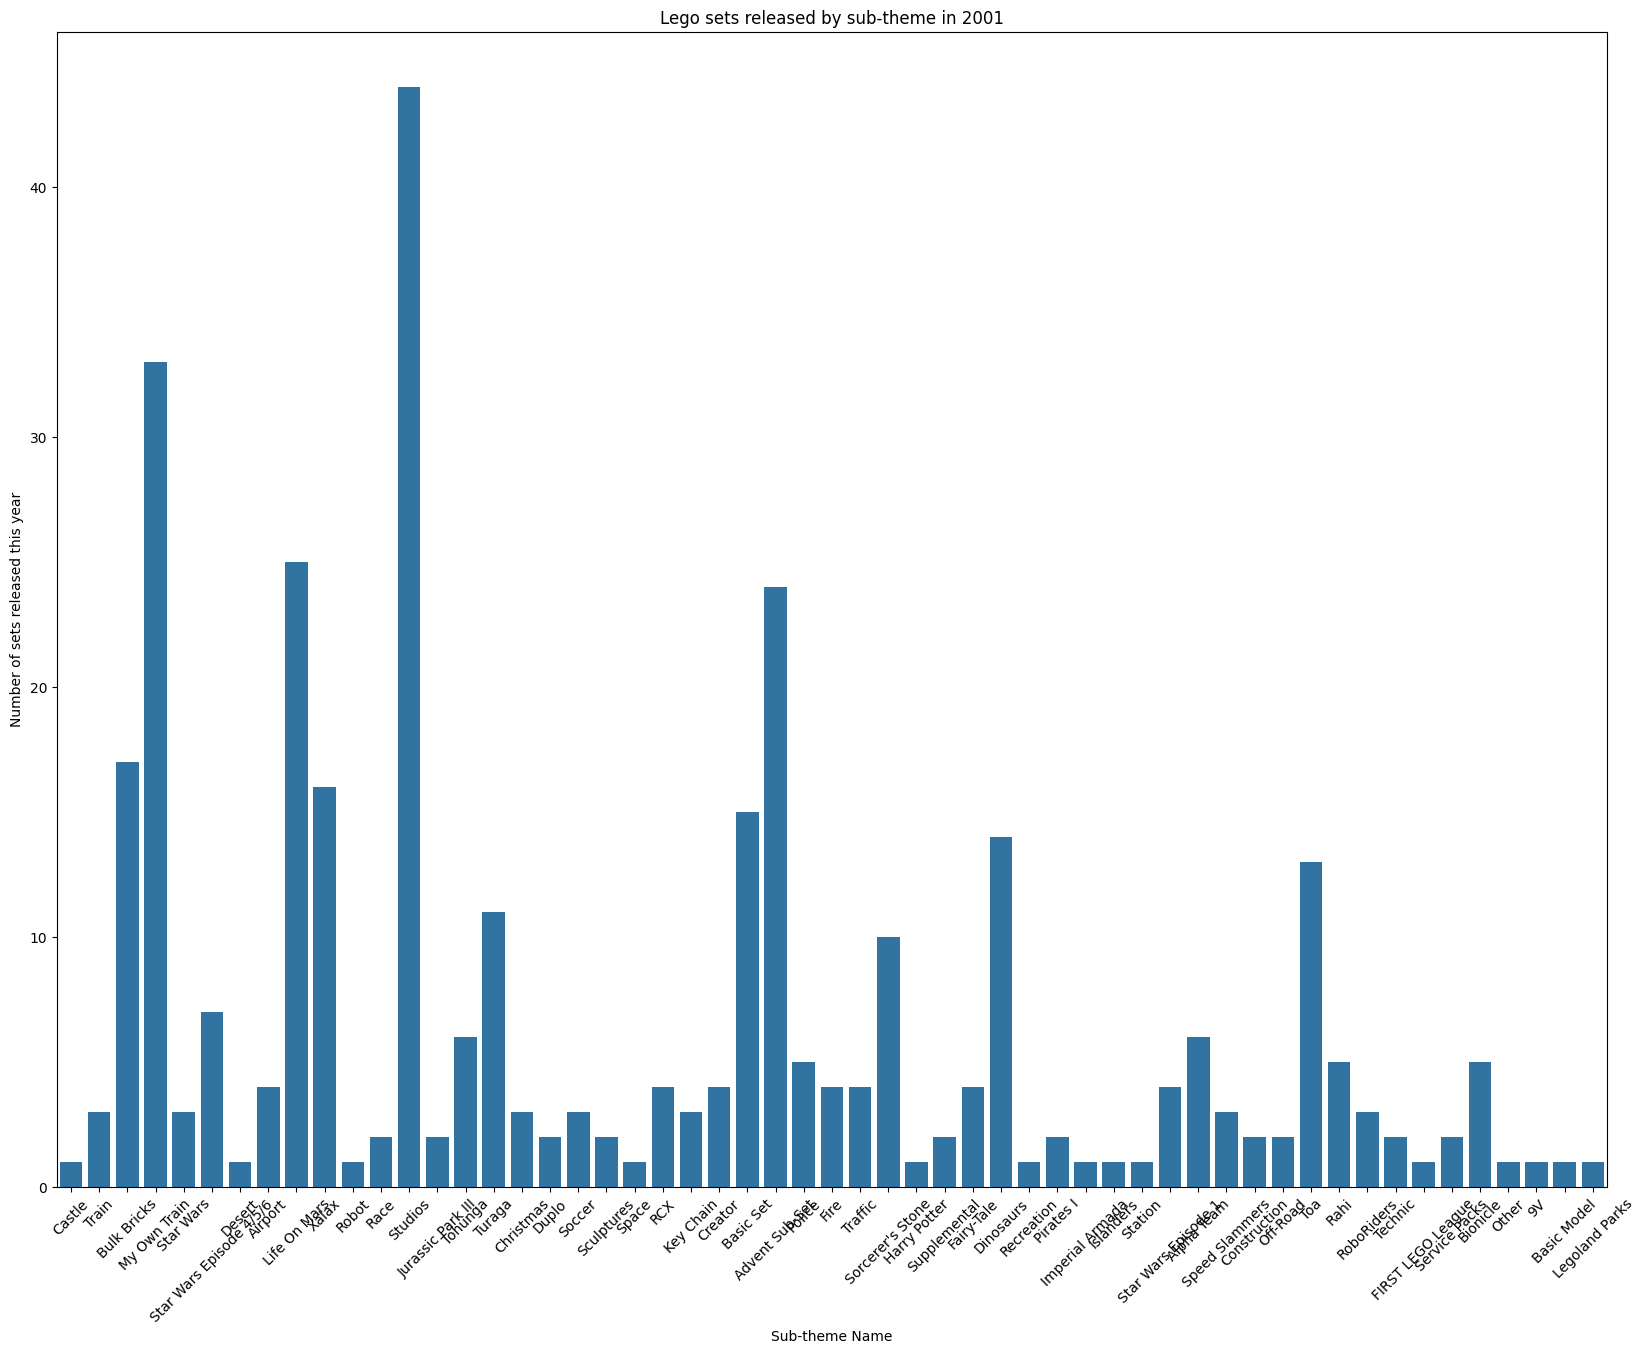

In [17]:
plt.figure(figsize=(20,15))
sns.countplot(x='theme_id', data=df_2001sets)
plt.ylabel('Number of sets released this year')
plt.xlabel('Sub-theme Name')
plt.xticks(rotation=45)
plt.title('Lego sets released by sub-theme in 2001')

Text(0.5, 1.0, 'Lego sets released by theme in 2001')

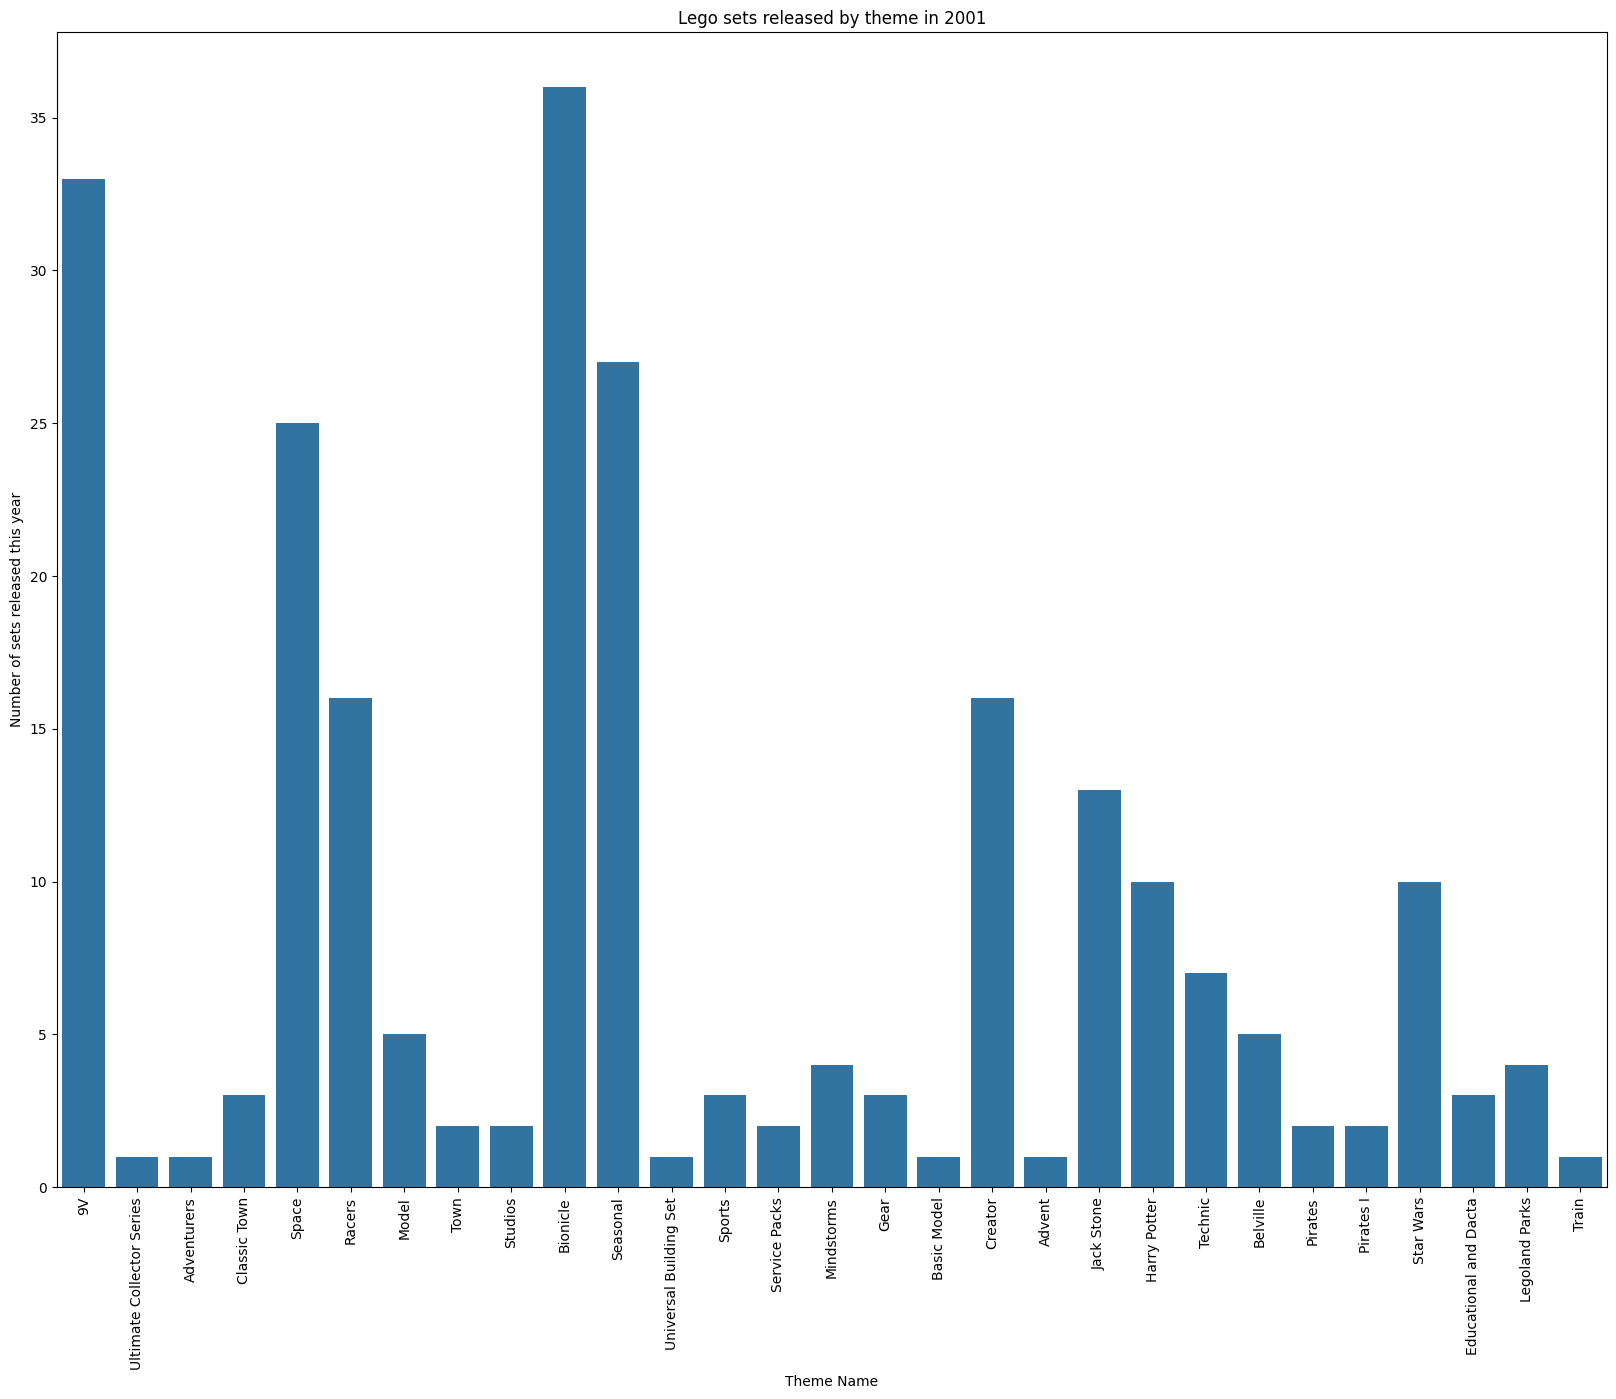

In [19]:
plt.figure(figsize=(20,15))
sns.countplot(x='Parent Theme', data=df_2001sets)
plt.ylabel('Number of sets released this year')
plt.xlabel('Theme Name')
plt.xticks(rotation=90)
plt.title('Lego sets released by theme in 2001')